# K Nearest Neighbors

KNN is a form of instance, or memory based learning wherein we don't learn a function $f(X)$ to estimate $E[Y|X]$. Rather, to make a classification or regression for a given instance $X_i$, we search the training data for the $k$ nearest neighbors, as defined by some distance metric $d(X_i,X_j)$. 

In the following example we run kNN on some real data from an ad conversion prediction dataset.

This demo is adapted from https://notebook.community/AstroHackWeek/AstroHackWeek2017/day1/notebooks/demo-KNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

Let's imagine we measure two attributes, $x_1$ and $x_2$ for some objects, and we also know the classes that these objects belong to ("star", 0, or "galaxy", 1) -- maybe we classified these objects by hand, or knew through some other means. We now observe ($x_1$, $x_2$) for a new object and want to know whether it belongs to class 0 or 1.

First let's generate some synthetic data with known classes:

In [ ]:
#specifying the mean, covariance matrix shape and number of samples
a = np.random.multivariate_normal([1., 0.5], 
                                  [[4., 0.],
                                   [0., 0.25]], size=512)

b = np.random.multivariate_normal([10., 8.], 
                                  [[1., 0.],
                                   [0., 25]], size=1024)

X = np.vstack((a,b))
y = np.concatenate((np.zeros(len(a)), 
                    np.ones(len(b))))

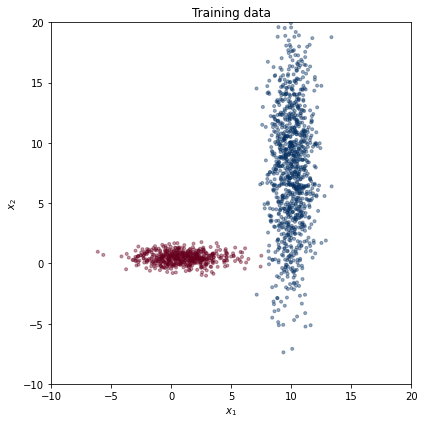

In [ ]:
#illustrating the data

plt.figure(figsize=(6,6))

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', marker='.', alpha=0.4)

plt.xlim(-10, 20)
plt.ylim(-10, 20)

plt.title('Training data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()

We now observe a new point, and would like to know which class it belongs to:

In [ ]:
np.random.seed(42)
new_pt = np.random.uniform(-10, 20, size=2)

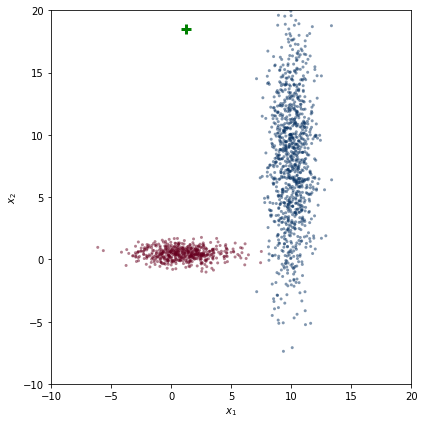

In [ ]:
#plotting the new point (green cross)
plt.figure(figsize=(6,6))

plt.scatter(X[:,0], X[:,1], c=y, cmap='RdBu', marker='.', alpha=0.5, linewidth=0)
plt.scatter(new_pt[0], new_pt[1], marker='+', color='g', s=100, linewidth=3)

plt.xlim(-10, 20)
plt.ylim(-10, 20)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()

KNN works by predicting the class of a new point based on the classes of the K training data points closest to the new point. **The two things that can be customized about this method are K, the number of points to use, and the distance metric used to compute the distances between the new point and the training data.** If the dimensions in your data are measured with different units or with very different measurement uncertainties, you might need to be careful with the way you choose this metric. For simplicity, we'll start by fixing K=16 and use a Euclidean distance to see how this works in practice:

In [ ]:
def distance(pts1, pts2):
    pts1 = np.atleast_2d(pts1)
    pts2 = np.atleast_2d(pts2)
    return np.sqrt( (pts1[:,0]-pts2[:,0])**2 + (pts1[:,1]-pts2[:,1])**2)

In [ ]:
K = 16
# compute the distance between all training data points and the new point
dists = distance(X, new_pt)

# get the classes (from the training data) of the K nearest points
nearest_classes = y[np.argsort(dists)[:K]]

nearest_classes

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

All of the closest points are from class 1, so we would classify the new point as class=1. If there is a mixture of possible classes, take the class with more neighbors. **If it's a tie, choose a class at random.** That's it! Let's see how to use the KNN classifier in scikit-learn:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=16)
clf.fit(X, y)

clf.predict(new_pt.reshape(1, -1)) # input has to be 2D

array([1.])

Let's visualize the decision boundary of this classifier **by evaluating the predicted class for a grid of trial data**:

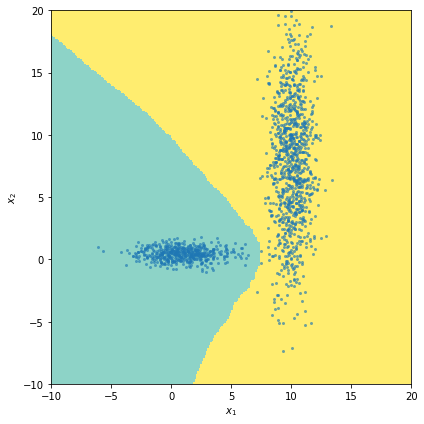

In [ ]:
grid_1d = np.linspace(-10, 20, 256)
grid_x1, grid_x2 = np.meshgrid(grid_1d, grid_1d)
grid = np.stack((grid_x1.ravel(), grid_x2.ravel()), axis=1)

y_grid = clf.predict(grid)

plt.figure(figsize=(6,6))

plt.pcolormesh(grid_x1, grid_x2, y_grid.reshape(grid_x1.shape), 
               cmap='Set3', alpha=1.)

plt.scatter(X[:,0], X[:,1], marker='.', alpha=0.65, linewidth=0)

plt.xlim(-10, 20)
plt.ylim(-10, 20)

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()

Let's now look at a more complicated example where the training data classes overlap significantly:

In [ ]:
a = np.random.multivariate_normal([6., 0.5], 
                                  [[8., 0.],
                                   [0., 0.25]], size=512)

b = np.random.multivariate_normal([10., 4.], 
                                  [[2., 0.],
                                   [0., 8]], size=1024)

X2 = np.vstack((a,b))
y2 = np.concatenate((np.zeros(len(a)), 
                     np.ones(len(b))))

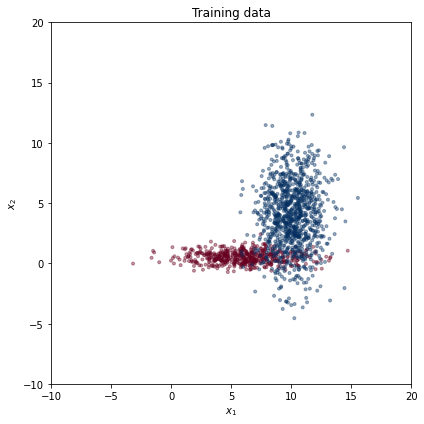

In [ ]:
plt.figure(figsize=(6,6))

plt.scatter(X2[:,0], X2[:,1], c=y2, cmap='RdBu', marker='.', alpha=0.4)

plt.xlim(-10, 20)
plt.ylim(-10, 20)

plt.title('Training data')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.tight_layout()

What does the decision boundary look like in this case, as a function of the number of neighbors, K?

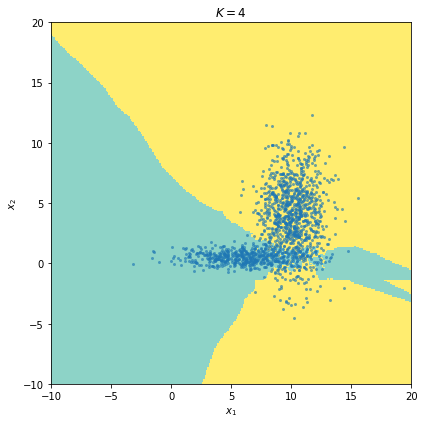

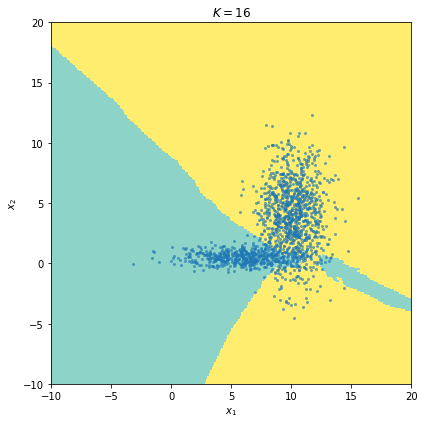

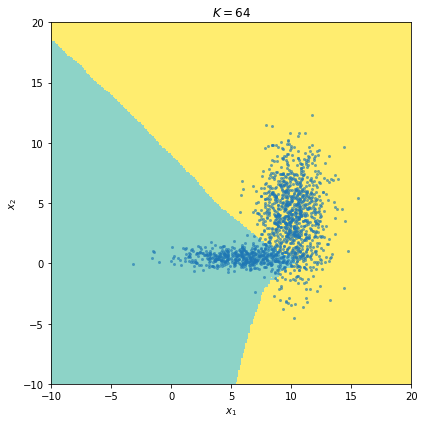

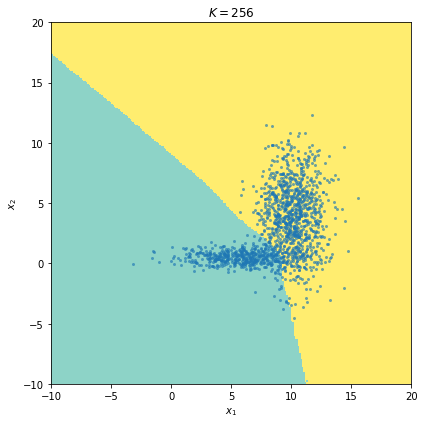

In [ ]:
for K in [4, 16, 64, 256]:
    clf2 = KNeighborsClassifier(n_neighbors=K)
    clf2.fit(X2, y2)

    y_grid2 = clf2.predict(grid)
    
    plt.figure(figsize=(6,6))

    plt.pcolormesh(grid_x1, grid_x2, y_grid2.reshape(grid_x1.shape), 
                   cmap='Set3', alpha=1.)

    plt.scatter(X2[:,0], X2[:,1], marker='.', alpha=0.65, linewidth=0)

    plt.xlim(-10, 20)
    plt.ylim(-10, 20)

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
    plt.title("$K={0}$".format(K))

    plt.tight_layout()